# Minist Basic Approach- (Softmax)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_DATA/',one_hot= True)

In [3]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

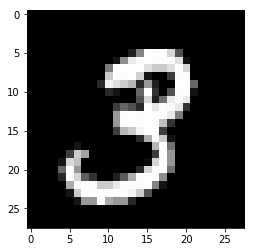

In [20]:
single_image = mnist.train.images[1].reshape(28,28)
plt.imshow(single_image,cmap = 'gist_gray')

In [25]:
# Create Place Holders
x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32,[None,10])

In [27]:
# Create Variable ops
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [28]:
# Create Graph Ops
y = tf.matmul(x,w)+b

In [42]:
# Create Loss function (softmax cross entropy loss function)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true,logits=y)) 

In [43]:
# Create Optimizer and train function
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss)

In [45]:
# Create Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(1000):
        batch_x,batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    
    # Evaluate the model
    pred = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    # convert[True,False,True,...] to [1,0,1,...]
    acc = tf.reduce_mean(tf.cast(pred,tf.float32))
    print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9193


# CNN Theory

Convolution Neural Network has a major advantage for image processing, where pixels nearby to each other are much more correlated to each other for image Detection.

Each CNN layer looks at an increasingly larger part of the image
Having units only connected to nearby units also aids in invariance.
CNN also helps with regularization, limiting the search of weights to the size of the convolution

...

# Minist CNN

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_DATA/',one_hot= True)

In [50]:
"""HELPER FUNCTIONS"""

# Init Weights
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(init_random_dist)

# Init Bias
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

# Convolution 2D
def conv2d(x,w):
    """ x --> [batch, Height,Weight,Channels]"""
    """ w --> [filter Height, filter Weight, Channels IN, Channels OUT]"""
    return tf.nn.conv2d(x,w,strides=[1,1,1,1],padding='SAME')

# Pooling
def max_pool_2by2(x):
    # x-->[batch, h, w, c]
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [58]:
# Convolutional Layer
def convolutional_layer(input_x,shape):
    w = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,w)+b)

# Normal Layer (Full Connected)
def normal_full_layer(input_layer,size):
    input_size = int(input_layer.get_shape()[1])
    w = init_weights([input_size,size])
    b = init_bias([size])
    return tf.matmul(input_layer,w)+b

In [61]:
# Placeholders
x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32, shape = [None,10])

# Layers
x_image = tf.reshape(x,[-1,28,28,1])
conv_1 = convolutional_layer(x_image,shape=[5,5,1,32])
conv_1_pooling = max_pool_2by2(conv_1)
conv_2 = convolutional_layer(conv_1_pooling,shape=[5,5,32,64])
conv_2_pooling = max_pool_2by2(conv_2)
conv_2_flat = tf.reshape(conv_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(conv_2_flat,1024))

# Dropout
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

# Predict
y_pred = normal_full_layer(full_one_dropout,10)

# Loss Function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits=y_pred))

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train=optimizer.minimize(loss)

# Session
steps = 5000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(steps):
        batch_x,batch_y = mnist.train.next_batch(50)
        sess.run(train, feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        if i%100 ==0:
            print("OnStep: {}".format(i))
            print("Accuracy: ")
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels,hold_prob:1.0}))
            print('\n')


OnStep: 0
Accuracy: 
0.1254


OnStep: 100
Accuracy: 
0.9428


OnStep: 200
Accuracy: 
0.9601


OnStep: 300
Accuracy: 
0.9656


OnStep: 400
Accuracy: 
0.9734


OnStep: 500
Accuracy: 
0.9757


OnStep: 600
Accuracy: 
0.9796


OnStep: 700
Accuracy: 
0.9818


OnStep: 800
Accuracy: 
0.9846


OnStep: 900
Accuracy: 
0.9851


OnStep: 1000
Accuracy: 
0.9788


OnStep: 1100
Accuracy: 
0.9843


OnStep: 1200
Accuracy: 
0.9861


OnStep: 1300
Accuracy: 
0.9865


OnStep: 1400
Accuracy: 
0.9879


OnStep: 1500
Accuracy: 
0.9871


OnStep: 1600
Accuracy: 
0.9855


OnStep: 1700
Accuracy: 
0.9856


OnStep: 1800
Accuracy: 
0.985


OnStep: 1900
Accuracy: 
0.9903


OnStep: 2000
Accuracy: 
0.9874


OnStep: 2100
Accuracy: 
0.9872


OnStep: 2200
Accuracy: 
0.9897


OnStep: 2300
Accuracy: 
0.987


OnStep: 2400
Accuracy: 
0.9901


OnStep: 2500
Accuracy: 
0.9874


OnStep: 2600
Accuracy: 
0.9879


OnStep: 2700
Accuracy: 
0.9877


OnStep: 2800
Accuracy: 
0.9903


OnStep: 2900
Accuracy: 
0.9892


OnStep: 3000
Accuracy: 
